In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=60, facecolor='white')
sns.set_style("ticks")


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [3]:
adata4_2 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W4_2.h5ad')
adata4_2.obs

,week_stage
index,
AAACCTGAGACCCACC-1-1-0-0-0-0-0-0-0-0-0-0,W4-2
AAACCTGAGCCCAGCT-1-1-0-0-0-0-0-0-0-0-0-0,W4-2
AAACCTGAGCGACGTA-1-1-0-0-0-0-0-0-0-0-0-0,W4-2
AAACCTGAGGAATTAC-1-1-0-0-0-0-0-0-0-0-0-0,W4-2
AAACCTGAGTATGACA-1-1-0-0-0-0-0-0-0-0-0-0,W4-2
...,...
TTTGTCATCGAACGGA-4-1-0-0-0-0-0-0-0-0-0-0,W4-2
TTTGTCATCGAATGCT-4-1-0-0-0-0-0-0-0-0-0-0,W4-2
TTTGTCATCGCCATAA-4-1-0-0-0-0-0-0-0-0-0-0,W4-2


In [4]:
adata4_2.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata4_2.obs["day"] = "4" # Записываем в `adata.obs` название платформы
adata4_2.obs["stage"] = "W4_2" # Записываем в `adata.obs` название платформы
adata4_2.layers["counts"] = adata4_2.X.copy() # Сразу создаём слой с каунтами

In [5]:
sc.pp.filter_cells(adata4_2, min_genes=200)
sc.pp.filter_genes(adata4_2, min_cells=3)

filtered out 8965 genes that are detected in less than 3 cells


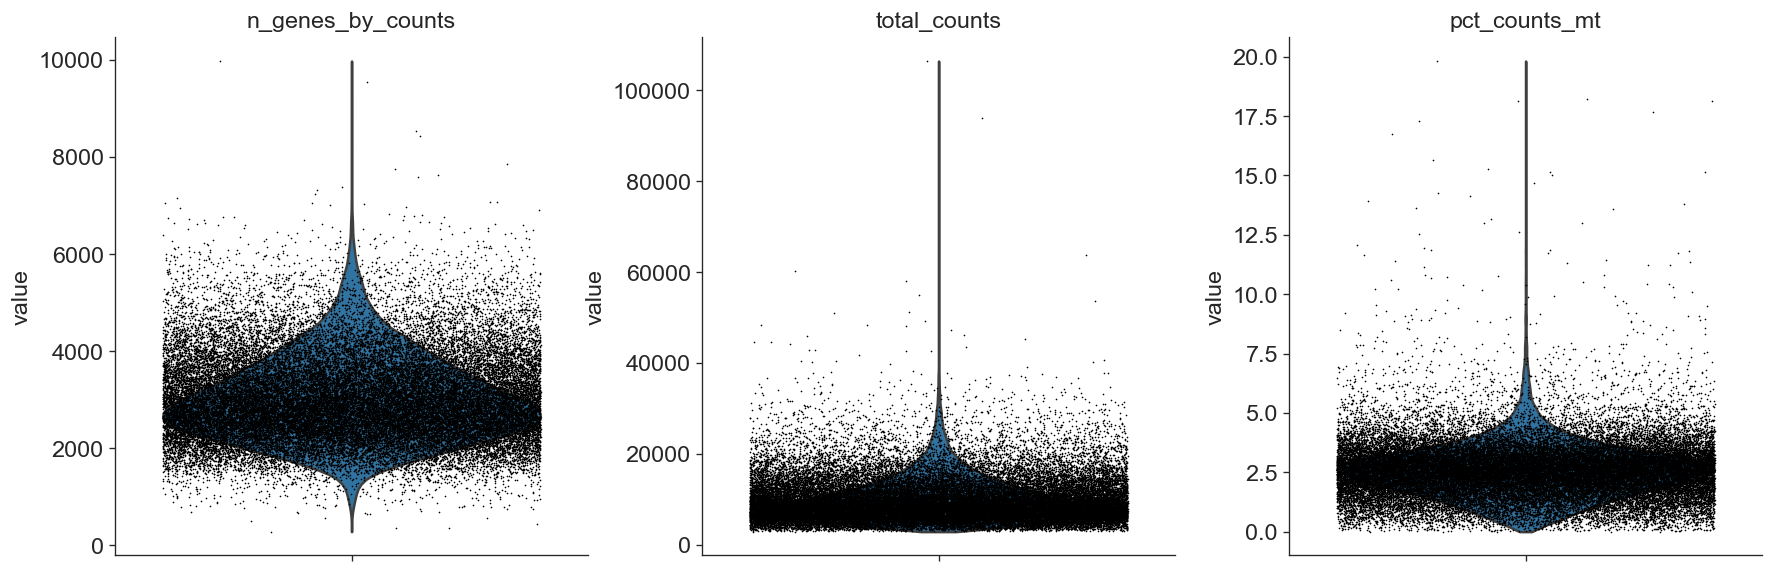

In [6]:
adata4_2.var['mt'] = adata4_2.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata4_2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata4_2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [7]:
adata4_2 = adata4_2[adata4_2.obs.n_genes_by_counts < 6000, :]
adata4_2 = adata4_2[adata4_2.obs.n_genes_by_counts > 1000, :]
adata4_2 = adata4_2[adata4_2.obs.pct_counts_mt < 6, :]

adata4_2 = adata4_2[adata4_2.obs.total_counts < 30000, :]

Running Scrublet
filtered out 97 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 47.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 6.6%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:01:23)


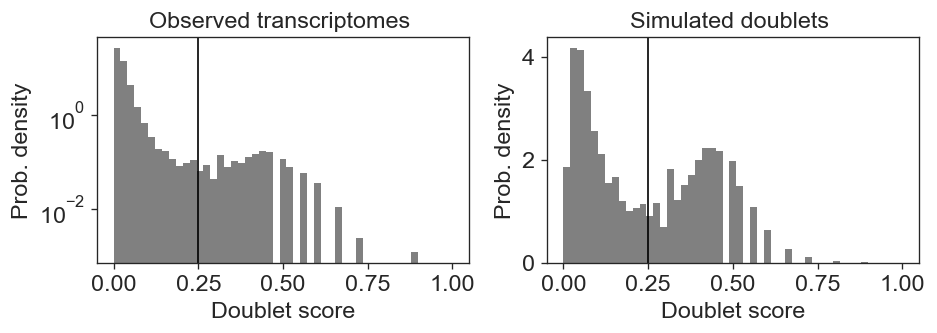

In [8]:
sc.external.pp.scrublet(adata4_2, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata4_2)
cells_not_to_remove = adata4_2.obs.loc[~adata4_2.obs.predicted_doublet].index.to_list()
adata4_2 = adata4_2[ cells_not_to_remove, :].copy()

In [9]:
adata4_2.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d4_2__subset.h5ad')

In [10]:
adata4_3 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W4_3.h5ad')
adata4_3.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata4_3.obs["stage"] = "W4_3" # Записываем в `adata.obs` название платформы
adata4_3.obs["day"] = "4" # Записываем в `adata.obs` название платформы
adata4_3.layers["counts"] = adata4_3.X.copy() # Сразу создаём слой с каунтами
adata4_3.obs
sc.pp.filter_cells(adata4_3, min_genes=200)
sc.pp.filter_genes(adata4_3, min_cells=3)

filtered out 10997 genes that are detected in less than 3 cells


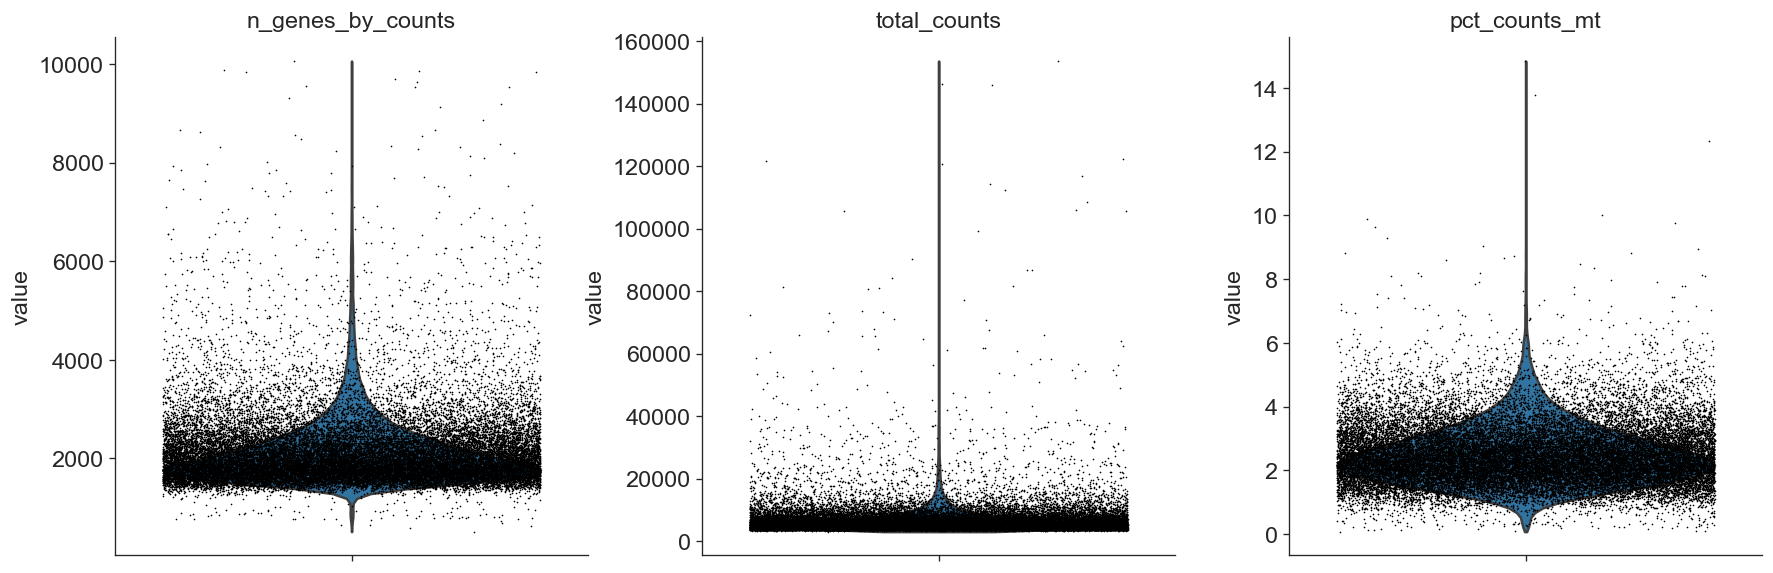

In [11]:
adata4_3.var['mt'] = adata4_3.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata4_3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata4_3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [12]:
adata4_3 = adata4_3[adata4_3.obs.n_genes_by_counts < 4000, :]
adata4_3 = adata4_3[adata4_3.obs.n_genes_by_counts > 1000, :]
adata4_3 = adata4_3[adata4_3.obs.pct_counts_mt < 6, :]

adata4_3 = adata4_3[adata4_3.obs.total_counts < 15000, :]


Running Scrublet
filtered out 433 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:03)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 41.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.8%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:01:18)


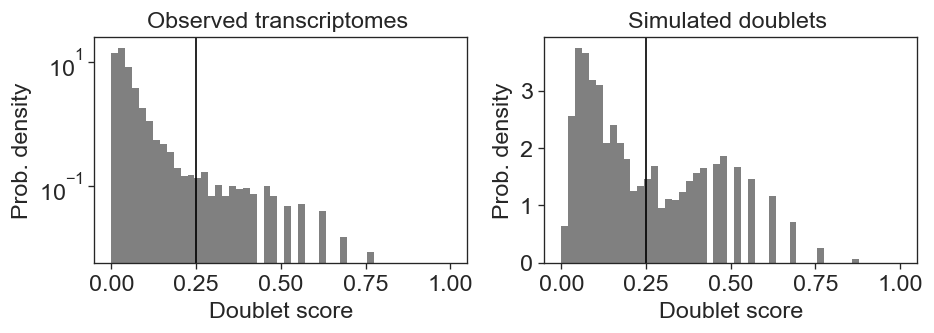

In [13]:
sc.external.pp.scrublet(adata4_3, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata4_3)
cells_not_to_remove = adata4_3.obs.loc[~adata4_3.obs.predicted_doublet].index.to_list()
adata4_3 = adata4_3[ cells_not_to_remove, :].copy()

In [14]:
adata4_3.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d4_3__subset.h5ad')

In [15]:
adata_5_3 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W5_3.h5ad')
adata_5_3.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata_5_3.obs["stage"] = "W5_3" # Записываем в `adata.obs` название платформы
adata_5_3.obs["day"] = "5" # Записываем в `adata.obs` название платформы
adata_5_3.layers["counts"] = adata_5_3.X.copy() # Сразу создаём слой с каунтами

In [16]:
sc.pp.filter_cells(adata_5_3, min_genes=200)
sc.pp.filter_genes(adata_5_3, min_cells=3)

filtered out 9611 genes that are detected in less than 3 cells


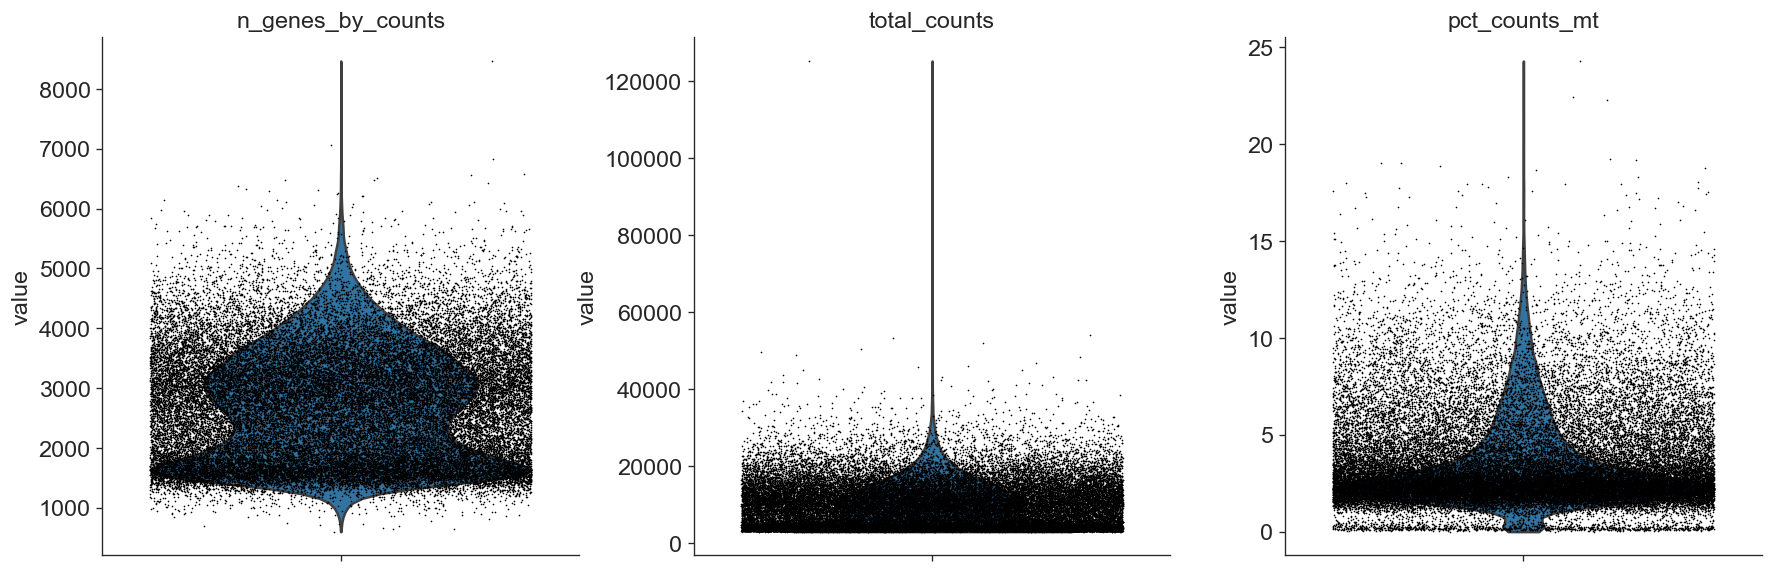

In [17]:
adata_5_3.var['mt'] = adata_5_3.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_5_3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_5_3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [18]:
adata_5_3 = adata_5_3[adata_5_3.obs.n_genes_by_counts < 4000, :]
adata_5_3 = adata_5_3[adata_5_3.obs.n_genes_by_counts > 1000, :]
adata_5_3 = adata_5_3[adata_5_3.obs.pct_counts_mt < 6, :]

adata_5_3 = adata_5_3[adata_5_3.obs.total_counts < 15000, :]


Running Scrublet
filtered out 955 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 34.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.7%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:00:47)


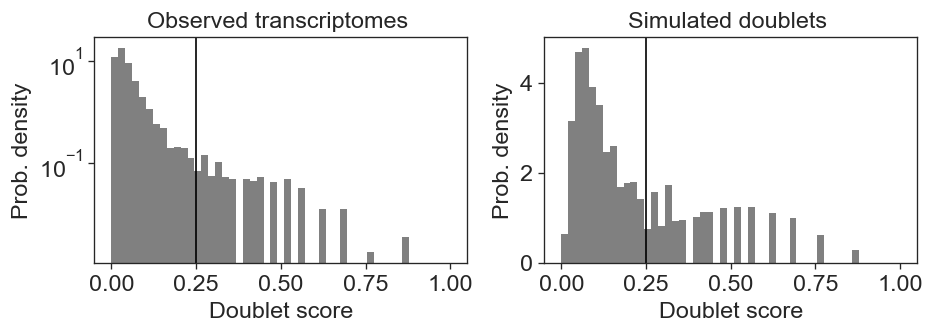

In [19]:
sc.external.pp.scrublet(adata_5_3, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata_5_3)
cells_not_to_remove = adata_5_3.obs.loc[~adata_5_3.obs.predicted_doublet].index.to_list()
adata_5_3 = adata_5_3[ cells_not_to_remove, :].copy()

In [20]:
adata_5_3.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d5_3__subset.h5ad')

In [21]:
adata_6 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W6_1.h5ad')

In [22]:
adata_6.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata_6.obs["day"] = "6" # Записываем в `adata.obs` название платформы
adata_6.obs["stage"] = "W6_1" # Записываем в `adata.obs` название платформы
adata_6.layers["counts"] = adata_6.X.copy() # Сразу создаём слой с каунтами

In [23]:
sc.pp.filter_cells(adata_6, min_genes=200)
sc.pp.filter_genes(adata_6, min_cells=3)

filtered out 9342 genes that are detected in less than 3 cells


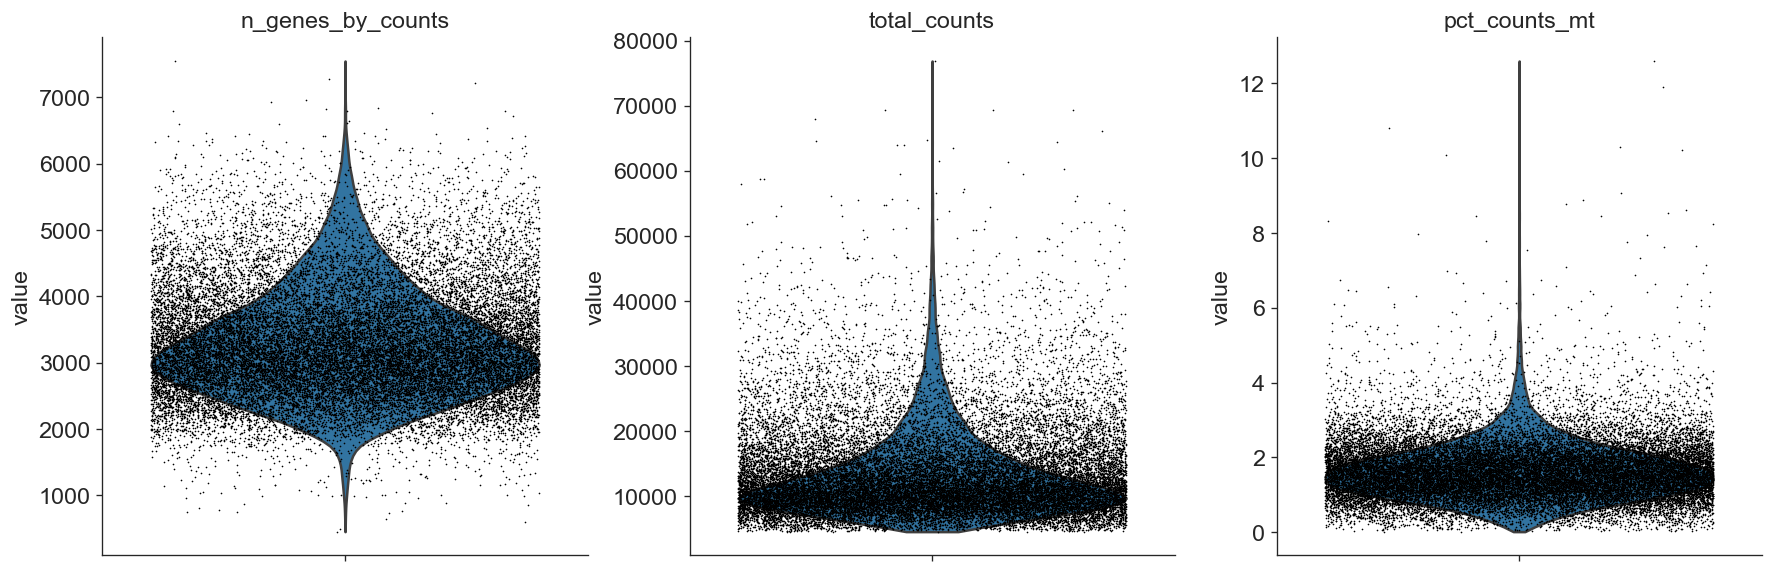

In [24]:
adata_6.var['mt'] = adata_6.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_6, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_6, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [25]:
adata_6 = adata_6[adata_6.obs.n_genes_by_counts < 6000, :]
adata_6 = adata_6[adata_6.obs.n_genes_by_counts > 1000, :]
adata_6 = adata_6[adata_6.obs.pct_counts_mt < 5, :]

adata_6 = adata_6[adata_6.obs.total_counts < 30000, :]
adata_6 = adata_6[adata_6.obs.total_counts > 5000, :]

Running Scrublet
filtered out 147 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 49.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.8%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:00:49)


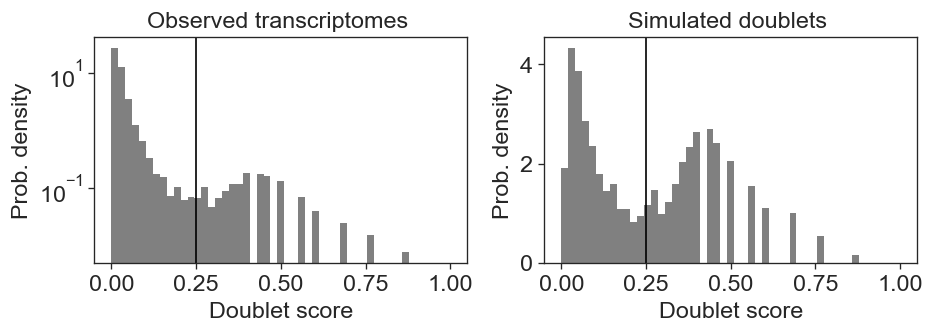

In [26]:
sc.external.pp.scrublet(adata_6, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata_6)
cells_not_to_remove = adata_6.obs.loc[~adata_6.obs.predicted_doublet].index.to_list()
adata_6 = adata_6[ cells_not_to_remove, :].copy()

In [27]:
adata_6.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d6_subset.h5ad')

In [28]:
adata_7 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W7_1.h5ad')

In [29]:
adata_7.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata_7.obs["day"] = "7" # Записываем в `adata.obs` название платформы
adata_7.obs["stage"] = "W7_1" # Записываем в `adata.obs` название платформы
adata_7.layers["counts"] = adata_7.X.copy() # Сразу создаём слой с каунтами

In [30]:
sc.pp.filter_cells(adata_7, min_genes=200)
sc.pp.filter_genes(adata_7, min_cells=3)

filtered out 9983 genes that are detected in less than 3 cells


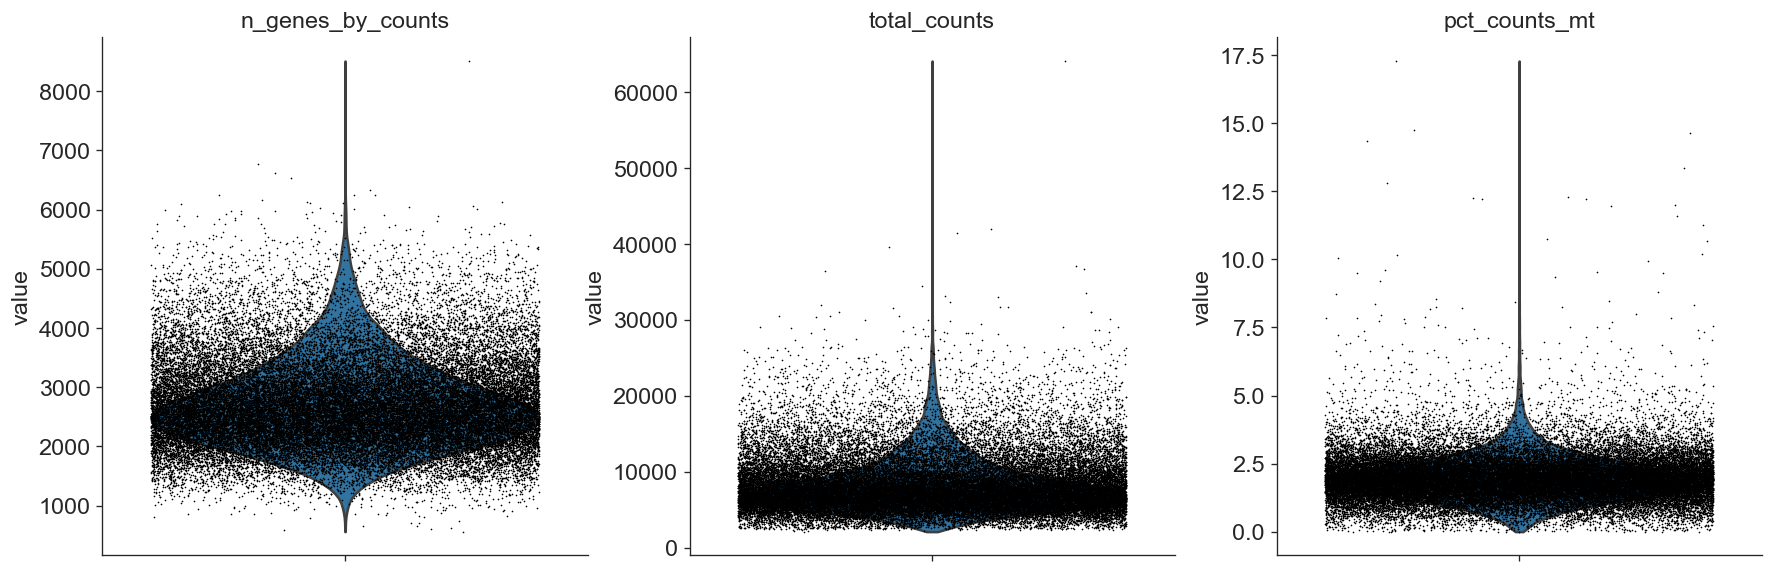

In [31]:
adata_7.var['mt'] = adata_7.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_7, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_7, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [32]:
adata_7 = adata_7[adata_7.obs.n_genes_by_counts < 5000, :]
adata_7 = adata_7[adata_7.obs.n_genes_by_counts > 1000, :]
adata_7 = adata_7[adata_7.obs.pct_counts_mt < 5, :]

adata_7 = adata_7[adata_7.obs.total_counts < 20000, :]

Running Scrublet
filtered out 113 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 50.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.3%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:01:42)


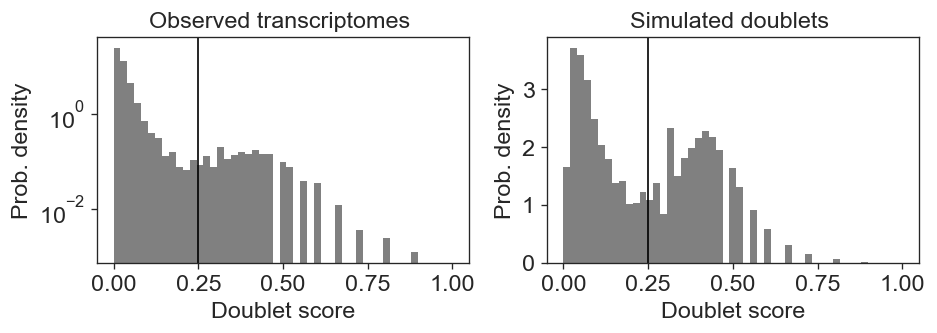

In [33]:
sc.external.pp.scrublet(adata_7, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata_7)
cells_not_to_remove = adata_7.obs.loc[~adata_7.obs.predicted_doublet].index.to_list()
adata_7 = adata_7[ cells_not_to_remove, :].copy()

In [34]:
adata_7.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d7_subset.h5ad')

In [35]:
adata_8 = sc.read_h5ad('/home/julia/GSE155121_human/separate_objects/W8_1.h5ad')

In [36]:
adata_8.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata_8.obs["day"] = "8" # Записываем в `adata.obs` название платформы
adata_8.obs["stage"] = "W8_1" # Записываем в `adata.obs` название платформы
adata_8.layers["counts"] = adata_8.X.copy() # Сразу создаём слой с каунтами

In [37]:
sc.pp.filter_cells(adata_8, min_genes=200)
sc.pp.filter_genes(adata_8, min_cells=3)

filtered out 10411 genes that are detected in less than 3 cells


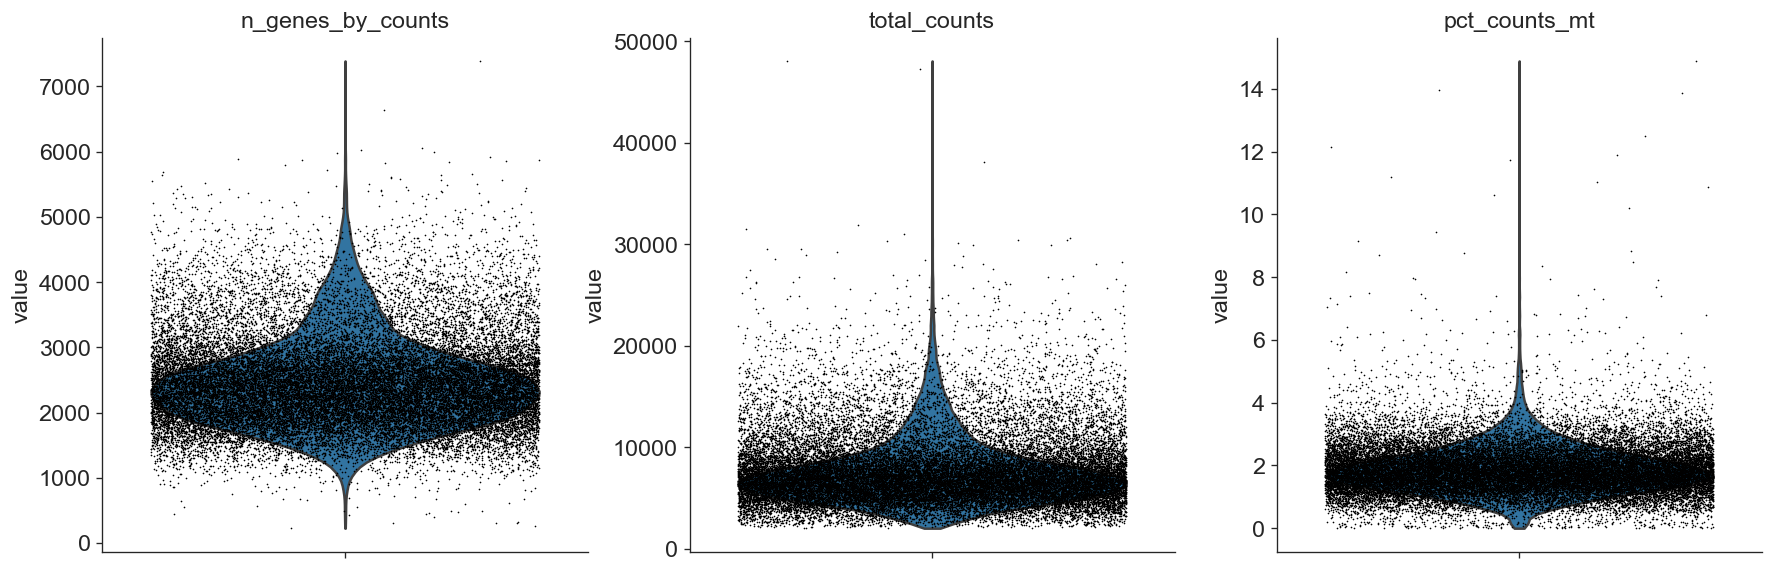

In [38]:
adata_8.var['mt'] = adata_8.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_8, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_8, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [39]:
adata_8 = adata_8[adata_8.obs.n_genes_by_counts < 4000, :]
adata_8 = adata_8[adata_8.obs.n_genes_by_counts > 1000, :]
adata_8 = adata_8[adata_8.obs.pct_counts_mt < 5, :]

adata_8 = adata_8[adata_8.obs.total_counts < 20000, :]

Running Scrublet
filtered out 192 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 50.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.8%


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


    Scrublet finished (0:00:48)


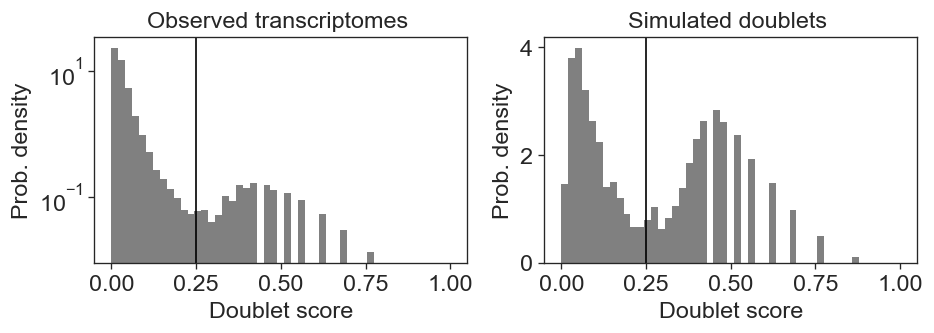

In [40]:
sc.external.pp.scrublet(adata_8, threshold = 0.25 )
sc.external.pl.scrublet_score_distribution(adata_8)
cells_not_to_remove = adata_8.obs.loc[~adata_8.obs.predicted_doublet].index.to_list()
adata_8 = adata_8[ cells_not_to_remove, :].copy()

In [41]:
adata_8.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d8_subset.h5ad')

In [42]:
adata=adata_8.concatenate(adata4_3,adata_5_3,adata_6,adata_7,  index_unique=None, join='outer' )

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the ne

In [43]:
adata

AnnData object with n_obs × n_vars = 147774 × 24862
    obs: 'week_stage', 'day', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'gene_ids-2', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-2', 'n_cells-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'gene_ids-3', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-3', 'feature_types-1-0-0-0-0-0

In [44]:
adata.var=adata.var.drop(columns = [
'gene_ids-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0', 
    'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1',
    'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-1', 'n_cells-1',
    'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'gene_ids-2', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-2', 
    'feature_types-1-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-2', 'n_cells-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2',
    'pct_dropout_by_counts-2', 'total_counts-2', 'gene_ids-3', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-3', 'feature_types-1-0-0-0-0-0-0-0-3', 
    'feature_types-1-0-0-0-0-0-3', 'n_cells-3', 'mt-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'gene_ids-4', 
    'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-4', 'feature_types-1-0-0-0-0-0-0-0-4', 'feature_types-1-0-0-0-0-0-4', 'n_cells-4', 'mt-4',
    'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4'
     ])

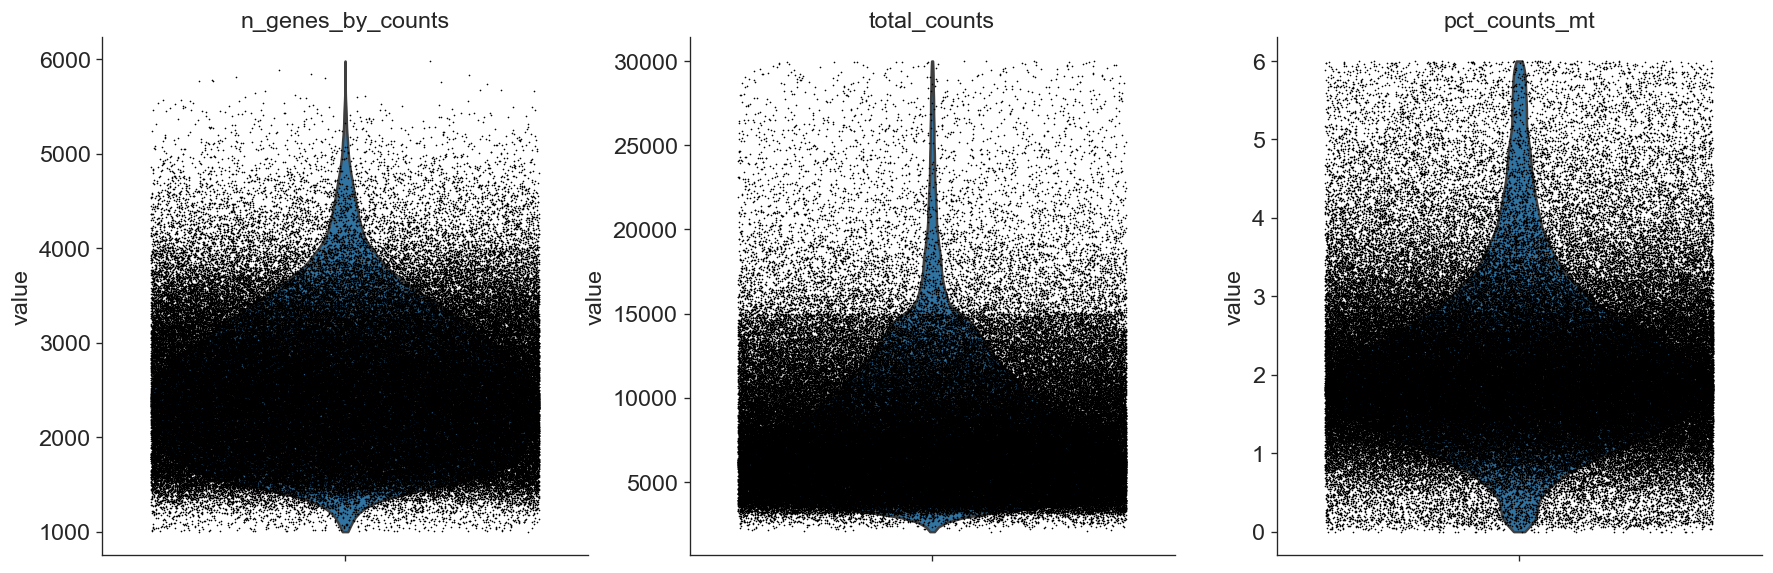

In [45]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [46]:
adata = adata[adata.obs.total_counts < 25000, :]

In [47]:
adata.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/qc_concat.h5ad')